In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from stargazer.stargazer import Stargazer


In [86]:
# Bring in the data
df = pd.read_csv('../data/HuntersGreenHomeSales_prepped.csv')

# Have a peak
df.head()


,slnoskm,Status,Address,Street_only,lat,long,Beds,bathsfull,bathshalf,bathstotal,sqft,garages,roof_Built-Up,roof_Concrete,roof_Shake,roof_Shingle,roof_Slate,roof_Tile,roof_Other,lotsqft,yrblt,pool_Community,pool_Private,pool_None,spa,subdivn,adom_agentdaysonmarket,cdom_cumuldaysmls,listprice,lppersqft,PendingDate,pd_dom,pd_moy,pd_year,sppersqft,datesold,ds_dom,ds_moy,ds_year,splsale,splsal_Auction,splsal_shortsale,splsale_BankOwnedREO,pricesold,days_on_market
0,1,Sold,17711 ESPRIT DR,ESPRIT DR,28.127921,-82.340184,3,2,0,2,1695,2.0,0,0,0,1,0,0,0,8694,1992,1,0,0,NaN,HUNTERS GREEN PH 1B 02,2,2,150000,88.50,7/12/2017,12,7,2017,83.48,10/6/2018,6,10,2018,Short Sale,0,1,0,141500,451
1,2,Sold,17769 ESPRIT DR,ESPRIT DR,28.130015,-82.339863,2,2,0,2,1305,2.0,0,0,0,1,0,0,0,6540,1992,0,0,1,NaN,HUNTERS GREEN PH 1A,133,133,179000,137.16,7/2/2015,2,7,2015,122.61,7/30/2015,30,7,2015,NaN,0,0,0,160000,28
2,3,Sold,17622 ESPRIT DR,ESPRIT DR,28.129953,-82.341055,3,2,0,2,1420,2.0,0,0,0,1,0,0,0,4845,1991,1,0,0,NaN,HUNTERS GREEN PRCL 17B PH 1A,4,4,165000,116.20,6/17/2015,17,6,2015,113.73,7/29/2015,29,7,2015,NaN,0,0,0,161500,42
3,4,Sold,18111 ASHTON PARK WAY,ASHTON PARK WAY,28.138067,-82.333513,3,2,0,2,1598,2.0,0,0,0,1,0,0,0,5750,1996,1,0,0,NaN,HUNTERS GREEN,44,44,184000,115.14,6/24/2016,24,6,2016,106.38,7/29/2016,29,7,2016,NaN,0,0,0,170000,35
4,5,Sold,9203 CELEBRATION CT,CELEBRATION CT,28.129131,-82.340659,4,2,1,3,2302,2.0,0,0,0,1,0,0,0,5390,1992,0,1,0,NaN,HUNTERS GREEN PH 1B 02,14,14,180000,78.19,8/10/2015,10,8,2015,73.85,9/30/2016,30,9,2016,Short Sale,0,1,0,170000,417


In [87]:
df.isnull().sum()


slnoskm                     0
Status                      0
Address                     0
Street_only                 0
lat                         0
long                        0
Beds                        0
bathsfull                   0
bathshalf                   0
bathstotal                  0
sqft                        0
garages                     4
roof_Built-Up               0
roof_Concrete               0
roof_Shake                  0
roof_Shingle                0
roof_Slate                  0
roof_Tile                   0
roof_Other                  0
lotsqft                     0
yrblt                       0
pool_Community              0
pool_Private                0
pool_None                   0
spa                       313
subdivn                     0
adom_agentdaysonmarket      0
cdom_cumuldaysmls           0
listprice                   0
lppersqft                   0
PendingDate                 0
pd_dom                      0
pd_moy                      0
pd_year   

We won't use spa

In [88]:
df = df.drop(['spa'], axis=1)
df = df.dropna()

In [89]:
df.describe()


,slnoskm,lat,long,Beds,bathsfull,bathshalf,bathstotal,sqft,garages,roof_Built-Up,roof_Concrete,roof_Shake,roof_Shingle,roof_Slate,roof_Tile,roof_Other,lotsqft,yrblt,pool_Community,pool_Private,pool_None,adom_agentdaysonmarket,cdom_cumuldaysmls,listprice,lppersqft,pd_dom,pd_moy,pd_year,sppersqft,ds_dom,ds_moy,ds_year,splsal_Auction,splsal_shortsale,splsale_BankOwnedREO,pricesold,days_on_market
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.0,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,90.071429,28.130795,-82.340774,3.678571,2.357143,0.428571,2.785714,2383.178571,2.285714,0.0,0.0,0.035714,0.678571,0.035714,0.321429,0.0,9648.535714,1994.464286,0.178571,0.607143,0.250000,55.500000,68.0000,247660.714286,103.744643,15.535714,5.857143,2016.535714,101.041786,20.321429,6.892857,2016.642857,0.107143,0.285714,0.714286,240997.285714,75.642857
std,95.366322,0.003039,0.006640,0.669636,0.678467,0.503953,0.786796,783.457156,0.534522,0.0,0.0,0.188982,0.475595,0.188982,0.475595,0.0,8777.596087,2.700921,0.390021,0.497347,0.440959,53.970156,65.3866,118616.975674,20.060346,10.351175,3.205485,1.346660,20.396226,7.508285,3.269832,1.366647,0.314970,0.460044,0.460044,115659.863388,104.960386
min,1.000000,28.127464,-82.356262,3.000000,2.000000,0.000000,2.000000,1507.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4500.000000,1990.000000,0.000000,0.000000,0.000000,2.000000,2.0000,150000.000000,74.920000,3.000000,1.000000,2015.000000,73.850000,2.000000,1.000000,2015.000000,0.000000,0.000000,0.000000,141500.000000,11.000000
25%,25.000000,28.128614,-82.342520,3.000000,2.000000,0.000000,2.000000,1851.500000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,5897.000000,1993.000000,0.000000,0.000000,0.000000,15.000000,15.0000,197725.000000,88.122500,7.000000,3.000000,2015.000000,86.112500,16.750000,4.750000,2015.000000,0.000000,0.000000,0.000000,192625.000000,28.500000
50%,71.500000,28.130434,-82.340248,4.000000,2.000000,0.000000,3.000000,2294.000000,2.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,7362.500000,1994.000000,0.000000,1.000000,0.000000,40.000000,57.0000,229400.000000,102.210000,12.500000,6.000000,2017.000000,97.980000,20.000000,6.500000,2017.000000,0.000000,0.000000,1.000000,222000.000000,42.500000
75%,107.750000,28.131821,-82.336838,4.000000,3.000000,1.000000,3.000000,2595.750000,2.250000,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.0,10496.750000,1996.000000,0.000000,1.000000,0.250000,75.000000,81.0000,251175.000000,112.452500,28.250000,8.000000,2017.000000,113.090000,26.250000,9.250000,2018.000000,0.000000,1.000000,1.000000,240125.000000,72.500000
max,471.000000,28.138178,-82.328936,5.000000,5.000000,1.000000,6.000000,5688.000000,4.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,52438.000000,2004.000000,1.000000,1.000000,1.000000,207.000000,247.0000,821500.000000,145.320000,31.000000,12.000000,2019.000000,145.320000,31.000000,12.000000,2019.000000,1.000000,1.000000,1.000000,799724.000000,451.000000


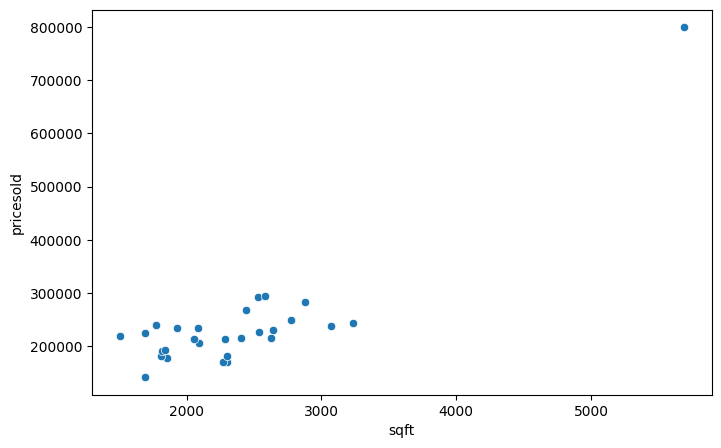

In [90]:
# Look at normality
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['sqft'], y=df['pricesold'])
plt.show()


In [91]:
df['log_sqft'] = np.log1p(df['sqft'])

In [139]:
feature_cols = [
    'log_sqft',
    'sqft',
    'Beds',
    'bathstotal',
    'garages',
    'yrblt',
    'lat',
    'long',
    'pool_None',
    'roof_Tile',
    'pd_moy'
]

X1 = df[feature_cols]
y1 = df['pricesold']

model1 = sm.OLS(y1,X1).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:              pricesold   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              164.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):                    5.33e-15
Time:                        21:21:07   Log-Likelihood:                         -324.09
No. Observations:                  28   AIC:                                      670.2
Df Residuals:                      17   BIC:                                      684.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [156]:
dft = df[['Street_only','log_sqft','yrblt','roof_Tile','pricesold', 'subdivn', 'splsale']]

modt = smf.ols(formula='pricesold ~ lat + long + Beds + bathsfull + bathshalf + bathstotal + sqft + log_sqft + splsale', data=df).fit()

print(modt.summary())

                            OLS Regression Results                            
Dep. Variable:              pricesold   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     31.36
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.34e-09
Time:                        21:41:53   Log-Likelihood:                -326.26
No. Observations:                  28   AIC:                             672.5
Df Residuals:                      18   BIC:                             685.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [152]:
feature_cols = [
    'log_sqft',
    'sqft',
    'Beds',
    'bathstotal',
    'garages',
    'yrblt',
    'lat',
    'long',
    'pool_None',
    'roof_Tile',
    'pd_moy'
]

X1 = df[feature_cols]
y1 = df['pricesold']

model1 = sm.OLS(y1,X1).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:              pricesold   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              164.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):                    5.33e-15
Time:                        21:37:34   Log-Likelihood:                         -324.09
No. Observations:                  28   AIC:                                      670.2
Df Residuals:                      17   BIC:                                      684.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
feature_cols = [
    'log_sqft',
    'sqft',
    'Beds',
    'bathstotal',
    'garages',
    'yrblt',
    'lat',
    'long',
    'pool_None',
    'roof_Tile',
    'pd_moy'
]

X1 = df[feature_cols]
y1 = df['pricesold']

model1 = sm.OLS(y1,X1).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:              pricesold   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              164.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):                    5.33e-15
Time:                        21:05:14   Log-Likelihood:                         -324.09
No. Observations:                  28   AIC:                                      670.2
Df Residuals:                      17   BIC:                                      684.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------